# üìä VISUALIZACI√ìN DE DATOS DE VISITANTES - TURISMO DIGITAL

In [17]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------
# 1) Conexi√≥n y carga de datos
# ---------------------------
client = MongoClient("mongodb://localhost:27017/")
db = client["TurismoPeru_2025"]
collection = db["Visitantes"]

data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print("‚úÖ Datos cargados desde MongoDB.")
print(f"üìä Total de registros: {len(df)}\n")
print("Vista previa:\n", df.head(), "\n")



‚úÖ Datos cargados desde MongoDB.
üìä Total de registros: 3000

Vista previa:
   id_visitante pais_origen  edad genero          destino    region  \
0        V0001        Per√∫    40      F       Huacachina       Ica   
1        V0002      Espa√±a    45      O          Iquitos    Loreto   
2        V0003       Chile    46    NaN       Miraflores      Lima   
3        V0004        Per√∫    57      M    Lago Titicaca      Puno   
4        V0005        Per√∫    40      F  Valle del Colca  Arequipa   

  fecha_visita  dias_estadia  gasto_total medio_transporte tipo_visitante  
0   2025-01-01            14      2153.83              Bus       Nacional  
1   2024-11-08             6      1018.37            Avi√≥n     Extranjero  
2   2025-01-01             3      2452.05            Barco     Extranjero  
3   2025-01-01            14      2602.93            Barco       Nacional  
4   2025-01-01             3      2463.87      Desconocido       Nacional   



In [20]:
# ========================================================
# üîπ 2. Carpeta para guardar gr√°ficos
# ========================================================
from pathlib import Path
img_dir  = (Path.cwd() / "../reports").resolve()
img_dir .mkdir(parents=True, exist_ok=True)

### üìà 1) Visitantes por regi√≥n


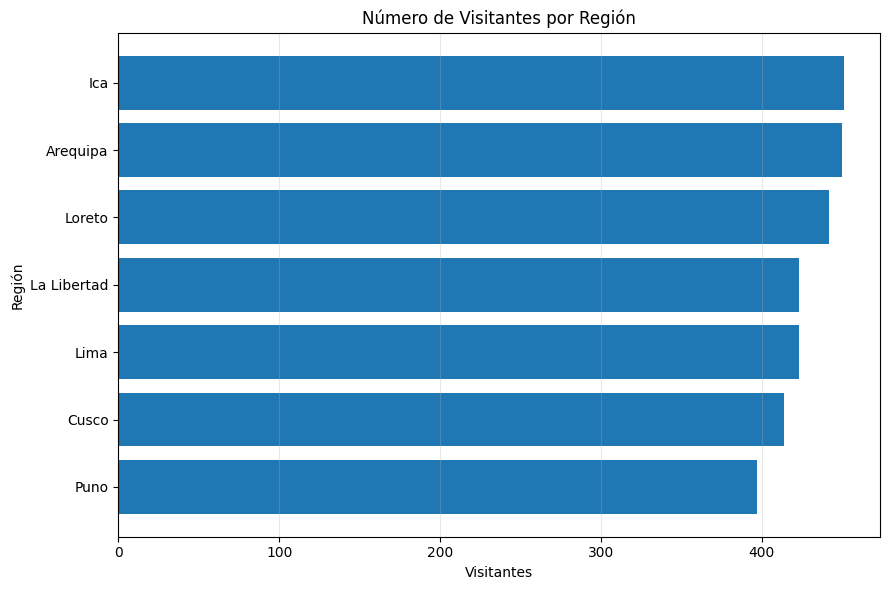

In [21]:
# ---------------------------
# 2) Visitantes por regi√≥n
# ---------------------------
print("### üìà 1) Visitantes por regi√≥n")
conteo_region = df["region"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(9, 6))
plt.barh(conteo_region.index.astype(str), conteo_region.values)
plt.title("N√∫mero de Visitantes por Regi√≥n")
plt.xlabel("Visitantes")
plt.ylabel("Regi√≥n")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig(img_dir / "visitantes_por_region.png")
plt.show()


### üìä 2) Pa√≠s de origen (Top 10)


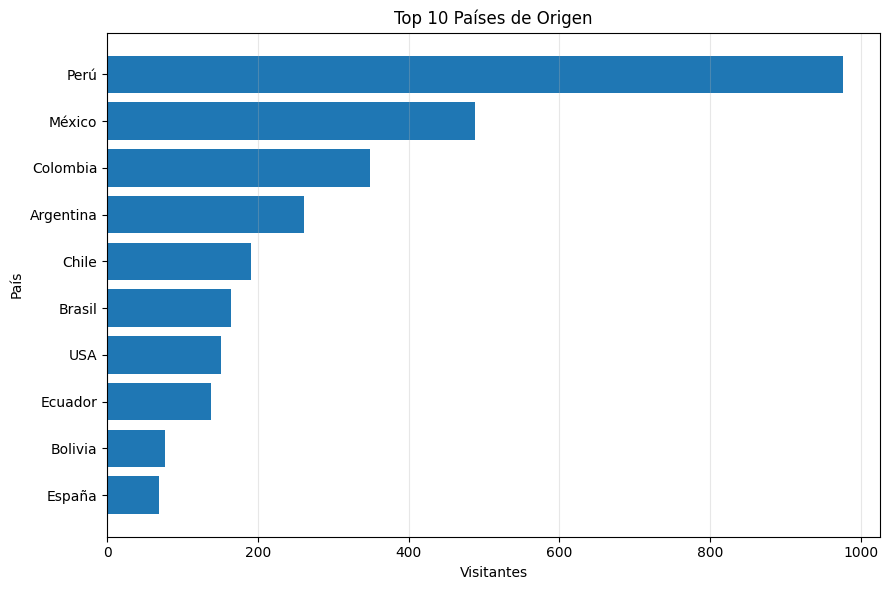

In [22]:
# ---------------------------
# 3) Pa√≠s de origen (Top 10)
# ---------------------------
print("\n### üìä 2) Pa√≠s de origen (Top 10)")
top_paises = df["pais_origen"].value_counts().nlargest(10).sort_values(ascending=True)

plt.figure(figsize=(9, 6))
plt.barh(top_paises.index.astype(str), top_paises.values)
plt.title("Top 10 Pa√≠ses de Origen")
plt.xlabel("Visitantes")
plt.ylabel("Pa√≠s")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig(img_dir / "top10_paises_origen.png")
plt.show()


### üìÖ 3) Tendencia mensual de visitas


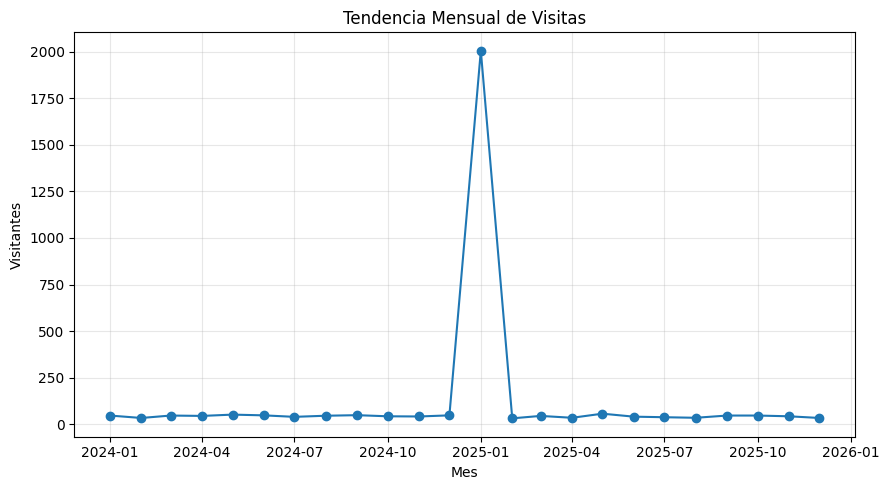

In [23]:
# ---------------------------
# 4) Tendencia mensual de visitas
# ---------------------------
print("\n### üìÖ 3) Tendencia mensual de visitas")
df["fecha_visita"] = pd.to_datetime(df["fecha_visita"], errors="coerce")
mensual = df.groupby(df["fecha_visita"].dt.to_period("M")).size()
mensual.index = mensual.index.to_timestamp()

plt.figure(figsize=(9, 5))
plt.plot(mensual.index, mensual.values, marker="o")
plt.title("Tendencia Mensual de Visitas")
plt.xlabel("Mes")
plt.ylabel("Visitantes")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(img_dir / "tendencia_mensual_visitas.png")
plt.show()




### üí∞ 4) Histograma del gasto total


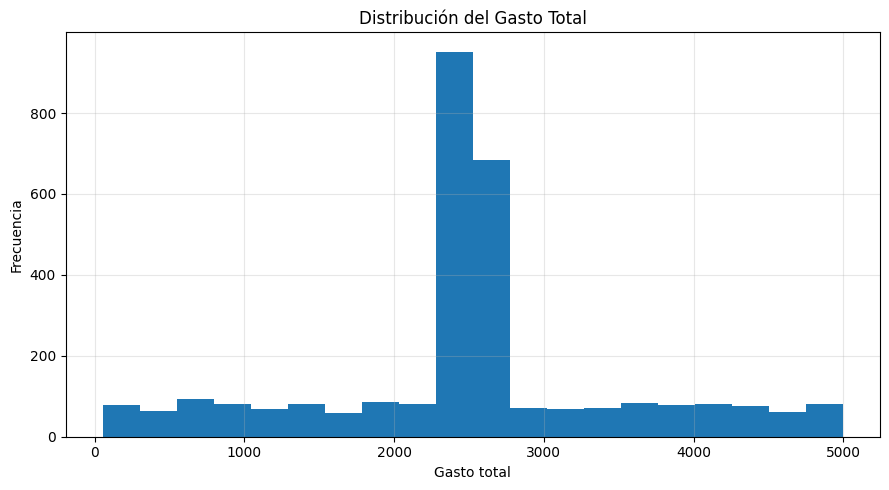

In [29]:
# ---------------------------
# 5) Histograma de gasto total
# ---------------------------
print("\n### üí∞ 4) Histograma del gasto total")
df["gasto_total"] = pd.to_numeric(df.get("gasto_total"), errors="coerce")

plt.figure(figsize=(9, 5))
plt.hist(df["gasto_total"].dropna(), bins=20)
plt.title("Distribuci√≥n del Gasto Total")
plt.xlabel("Gasto total")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(img_dir / "histograma_total.png")
plt.show()



### üïí 5) D√≠as de estad√≠a vs Gasto total


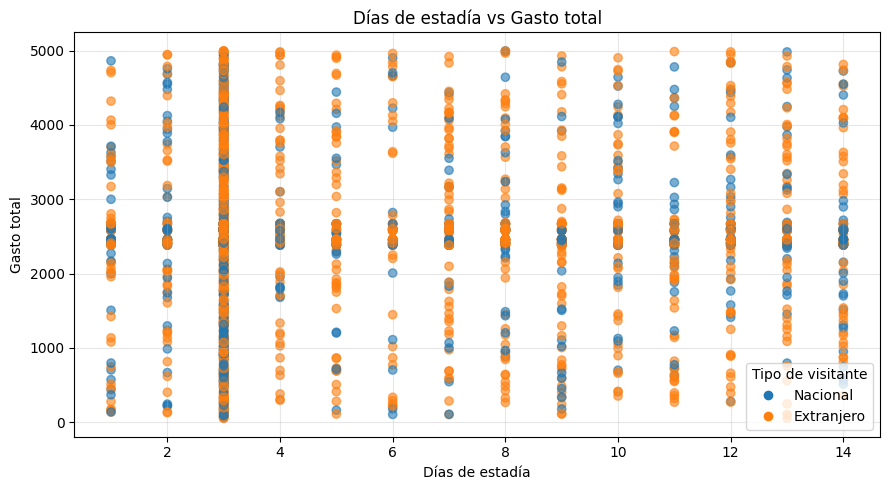

In [33]:
# ---------------------------
# 6) D√≠as de estad√≠a vs gasto total
# ---------------------------
print("\n### üïí 5) D√≠as de estad√≠a vs Gasto total")
df["dias_estadia"] = pd.to_numeric(df.get("dias_estadia"), errors="coerce")

plt.figure(figsize=(9, 5))

# Color por tipo_visitante si existe; si no, un solo color
if "tipo_visitante" in df.columns:
    colores = df["tipo_visitante"].map({"Nacional": "tab:blue", "Extranjero": "tab:orange"}).fillna("tab:gray")
    plt.scatter(df["dias_estadia"], df["gasto_total"], alpha=0.6, c=colores)

    # peque√±a gu√≠a
    from matplotlib.lines import Line2D
    legend_elems = [
        Line2D([0], [0], marker='o', color='w', label='Nacional', markerfacecolor='tab:blue', markersize=8),
        Line2D([0], [0], marker='o', color='w', label='Extranjero', markerfacecolor='tab:orange', markersize=8),
    ]
    plt.legend(handles=legend_elems, title="Tipo de visitante")
else:
    plt.scatter(df["dias_estadia"], df["gasto_total"], alpha=0.6)

plt.title("D√≠as de estad√≠a vs Gasto total")
plt.xlabel("D√≠as de estad√≠a")
plt.ylabel("Gasto total")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(img_dir / "dias_vs_gasto.png")
plt.show()


In [34]:
# ---------------------------
# 7) Top 5 visitantes por gasto
# ---------------------------
print("\n### üèÜ 6) Top 5 visitantes por gasto")
top5 = df.nlargest(5, "gasto_total")[["id_visitante","pais_origen","region","gasto_total"]]
print(top5.to_string(index=False))

print(f"\n‚úÖ Im√°genes guardadas en: {img_dir}")


### üèÜ 6) Top 5 visitantes por gasto
id_visitante pais_origen   region  gasto_total
       V1194     Ecuador     Puno      4997.68
       V1760        Per√∫ Arequipa      4995.82
       V2231         USA     Puno      4993.41
       V1191         USA     Puno      4990.92
       V2594      M√©xico Arequipa      4990.07

‚úÖ Im√°genes guardadas en: D:\TurismoDigitalB_E1\reports
